## ImportLibraries

In [278]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Library for data visualization
from datetime import datetime #Library for dealing with dates
import plotly.express as px #For data visualization
import seaborn as sns

In [279]:
df = pd.read_csv(r"C:\Users\Oluwaferanmi\Downloads\SendMe.csv")#read the csv file into jupyter notebook

In [280]:
df.head() #Display the first five rows

,Date,Name of Customer,Time of Order,Expected Time out,Expected Time of Delivery,Time Out Update,Why was the Order not Dispatched in 30mins?,Action Taken,New Expected Time Out,New Expected Time of Delivery,...,Boneless Beef 1kg,Goat Meat 1kg,Hake 1kg,Hake 1kg (Cleaned),Titus 1kg,Titus 1kg (Cleaned),Chicken 1kg,Cow Head & Neck 1kg,Naira Value,Fulfilment Center
0,07/06/2022 00:00,Mr Ojo Olukunle,17:05,17:35,18:35,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3185.0,Bashorun
1,26/07/2022 00:00,Mrs Adedokun,11:43,12:13,13:13,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Akobo
2,20/08/2022 00:00,Kemi,11:49,12:19,14:19,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Aleshinloye
3,12/08/2022 00:00,Omotayo A.,11:43,12:13,13:13,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Onikolobo
4,03/06/2022 00:00,Osasu,14:37,15:07,17:07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1430.0,Alakia


In [281]:
df.describe() #Get more information on the columns

,Discount Amount,Duration(minutes),Token pack(boneless beef),Token Pack (Cow Tail),Token Pack (Cow Hump),Token Pack (Cow Head & Neck),Token Pack (Cow Leg),Token Pack (Agemawo),Token Pack (Cow Assorted),Token Pack (Pomo),...,Agemawo 1kg,Boneless Beef 1kg,Goat Meat 1kg,Hake 1kg,Hake 1kg (Cleaned),Titus 1kg,Titus 1kg (Cleaned),Chicken 1kg,Cow Head & Neck 1kg,Naira Value
count,3.000000,176.000000,21.000000,9.000000,7.0,9.000000,5.000000,40.000000,16.000000,3.0,...,7.0,2.0,2.0,2.0,0.0,1.0,2.0,8.000000,1.0,293.000000
mean,3433.333333,53.181818,1.047619,1.666667,1.0,1.222222,1.200000,1.175000,1.187500,1.0,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.125000,1.0,4628.310580
std,3002.637729,52.099146,0.218218,0.866025,0.0,0.440959,0.447214,0.446496,0.403113,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.353553,NaN,5788.330221
min,900.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.000000,1.0,0.000000
25%,1775.000000,20.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.000000,1.0,2340.000000
50%,2650.000000,35.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.000000,1.0,3510.000000
75%,4700.000000,69.750000,1.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.000000,1.0,4810.000000
max,6750.000000,429.000000,2.000000,3.000000,1.0,2.000000,2.000000,3.000000,2.000000,1.0,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,2.000000,1.0,65260.000000


In [282]:
column_names = df.columns.values #Display all the column names in the dataset
columns_names = list(column_names) #return the columns names as a list
column_names

array(['Date', 'Name of Customer', 'Time of Order', 'Expected Time out',
       'Expected Time of Delivery', 'Time Out Update',
       'Why was the Order not Dispatched in 30mins?', 'Action Taken',
       'New Expected Time Out', 'New Expected Time of Delivery',
       'Discount Type', 'Discount Amount', 'Mode of Payment',
       'Delivery Status', 'Actual Time Of Delivery', 'Duration(minutes)',
       'Customer Type', 'Token pack(boneless beef)',
       'Token Pack (Cow Tail)', 'Token Pack (Cow Hump)',
       'Token Pack (Cow Head & Neck)', 'Token Pack (Cow Leg)',
       'Token Pack (Agemawo)', 'Token Pack (Cow Assorted)',
       'Token Pack (Pomo)', 'Token Pack (Cow Minced Meat)',
       'Token Pack (Shaki & Roundabout)', 'Value Pack (Agemawo)',
       'Value Pack (Boneless Beef)', 'Value Pack (Cow Head & Neck)',
       'Value Pack (Cow Hump)', 'Value Pack (Cow Assorted)',
       'Token Pack (Goat Meat)', 'Token Pack (Goat Assorted)',
       'Token Pack (Head & Leg)', 'Value Pack (Go

From the above, it can be seen that the prodcut list starts from the 18th column to the 54th column

In [283]:
product_list = column_names[17:53]
product_list #This returns the product list during the period of time

array(['Token pack(boneless beef)', 'Token Pack (Cow Tail)',
       'Token Pack (Cow Hump)', 'Token Pack (Cow Head & Neck)',
       'Token Pack (Cow Leg)', 'Token Pack (Agemawo)',
       'Token Pack (Cow Assorted)', 'Token Pack (Pomo)',
       'Token Pack (Cow Minced Meat)', 'Token Pack (Shaki & Roundabout)',
       'Value Pack (Agemawo)', 'Value Pack (Boneless Beef)',
       'Value Pack (Cow Head & Neck)', 'Value Pack (Cow Hump)',
       'Value Pack (Cow Assorted)', 'Token Pack (Goat Meat)',
       'Token Pack (Goat Assorted)', 'Token Pack (Head & Leg)',
       'Value Pack (Goat Meat)', 'Value Pack (Chicken)',
       'Token Pack (Chicken Gizzard)', 'Token Pack (Chicken)',
       'Value Pack (Titus)', 'Token Pack (Hake)', 'Value Pack (Hake)',
       'Token Pack (Titus)', 'Value Pack (Cow Tongue)', 'Agemawo 1kg',
       'Boneless Beef 1kg', 'Goat Meat 1kg', 'Hake 1kg',
       'Hake 1kg (Cleaned)', 'Titus 1kg', 'Titus 1kg (Cleaned)',
       'Chicken 1kg', 'Cow Head & Neck 1kg'], dtype=ob

## Data Cleaning
Cleaned the data to make it fit for analysis
 - Changed the date format to datetime

## Date Formatting

In [284]:
df["Date"] = df["Date"].apply(lambda x: x.split(" ")[0]) #Remove the hour and minute from the date column and return just the date

In [285]:
def validate(date_text):
    """
    This function returns
    the index of the date
    which is not in the 
    general format in the 
    date column
    """
    for i in range(len(date_text)):
        try:
            datetime.strptime(date_text[i], '%d/%m/%Y')
        except Exception as e:
            return i
        
print(validate.__doc__) #prints what the function does


    This function returns
    the index of the date
    which is not in the 
    general format in the 
    date column
    


In [286]:
validate(df["Date"])

29

In [287]:
df["Date"][29] #The 29th index in the date series is invalid

'0202-06-28'

In [288]:
df.drop([29], inplace=True) #Drop the row of the date with the invalid format

In [289]:
df["Date"] = pd.to_datetime(df["Date"]) #Change the dates to datetime

In [290]:
df["Date"].value_counts() #Returns the unique dates with their counts

2022-11-06    8
2022-04-30    7
2022-03-06    7
2022-04-06    6
2022-06-17    6
             ..
2022-06-15    1
2022-06-14    1
2022-04-19    1
2025-06-28    1
2023-10-09    1
Name: Date, Length: 130, dtype: int64

In [291]:
df["Date"].dtype #Get the data type of the date column

dtype('<M8[ns]')

## Null values

In [292]:
print(df.isnull().sum()) #Get the number of null values in each column

Date                                             0
Name of Customer                                 3
Time of Order                                    4
Expected Time out                                5
Expected Time of Delivery                        5
Time Out Update                                 86
Why was the Order not Dispatched in 30mins?    259
Action Taken                                   267
New Expected Time Out                          259
New Expected Time of Delivery                  259
Discount Type                                   31
Discount Amount                                296
Mode of Payment                                 21
Delivery Status                                  4
Actual Time Of Delivery                        121
Duration(minutes)                              124
Customer Type                                    4
Token pack(boneless beef)                      278
Token Pack (Cow Tail)                          290
Token Pack (Cow Hump)          

Looking at the above we can see that the product columns have a lot of empty values, this can be easily replaced with zero, which means that the product wasnt ordered by thecustomer.

### Product null values

In [293]:
for product in product_list:
    df[product].fillna(0, inplace = True) #FIlls the empty values in the products column with zero

In [294]:
df[product_list].head()#Check if the above worked correctly

,Token pack(boneless beef),Token Pack (Cow Tail),Token Pack (Cow Hump),Token Pack (Cow Head & Neck),Token Pack (Cow Leg),Token Pack (Agemawo),Token Pack (Cow Assorted),Token Pack (Pomo),Token Pack (Cow Minced Meat),Token Pack (Shaki & Roundabout),...,Value Pack (Cow Tongue),Agemawo 1kg,Boneless Beef 1kg,Goat Meat 1kg,Hake 1kg,Hake 1kg (Cleaned),Titus 1kg,Titus 1kg (Cleaned),Chicken 1kg,Cow Head & Neck 1kg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [295]:
print(df.isnull().sum()) #Recheck the number of missing values in each column

Date                                             0
Name of Customer                                 3
Time of Order                                    4
Expected Time out                                5
Expected Time of Delivery                        5
Time Out Update                                 86
Why was the Order not Dispatched in 30mins?    259
Action Taken                                   267
New Expected Time Out                          259
New Expected Time of Delivery                  259
Discount Type                                   31
Discount Amount                                296
Mode of Payment                                 21
Delivery Status                                  4
Actual Time Of Delivery                        121
Duration(minutes)                              124
Customer Type                                    4
Token pack(boneless beef)                        0
Token Pack (Cow Tail)                            0
Token Pack (Cow Hump)          

### Time of order null values
This can be replaced by the most common date during the period

In [296]:
rows_with_nan = [index for index, row in df[["Time of Order"]].iterrows() if row.isnull().any()]
#The above returns the index of the rows in Time of order that are empty

In [297]:
rows_with_nan

[70, 162, 199, 295]

In [298]:
mode = df[df["Time of Order"]!="?"]["Time of Order"].mode()[0]
df['Time of Order'] = df['Time of Order'].replace(np.nan, mode)

df["Time of Order"].isnull().sum()

0

In [299]:
print(df.isnull().sum())

Date                                             0
Name of Customer                                 3
Time of Order                                    0
Expected Time out                                5
Expected Time of Delivery                        5
Time Out Update                                 86
Why was the Order not Dispatched in 30mins?    259
Action Taken                                   267
New Expected Time Out                          259
New Expected Time of Delivery                  259
Discount Type                                   31
Discount Amount                                296
Mode of Payment                                 21
Delivery Status                                  4
Actual Time Of Delivery                        121
Duration(minutes)                              124
Customer Type                                    4
Token pack(boneless beef)                        0
Token Pack (Cow Tail)                            0
Token Pack (Cow Hump)          

In [300]:
# df["Time of Order"] = pd.to_datetime(df["Time of Order"])
# df["Expected Time out"] = pd.to_datetime(df["Expected Time out"])
# df["Expected Time of Delivery"] = pd.to_datetime(df["Expected Time of Delivery"])

## Exploration of Data

In [301]:
df_sub = df.copy() #Create a copy of the dataframe which will be used for analysis
df_sub_prod = df_sub[product_list] #Get just the product columns

In [302]:
df_sub_prod.head()

,Token pack(boneless beef),Token Pack (Cow Tail),Token Pack (Cow Hump),Token Pack (Cow Head & Neck),Token Pack (Cow Leg),Token Pack (Agemawo),Token Pack (Cow Assorted),Token Pack (Pomo),Token Pack (Cow Minced Meat),Token Pack (Shaki & Roundabout),...,Value Pack (Cow Tongue),Agemawo 1kg,Boneless Beef 1kg,Goat Meat 1kg,Hake 1kg,Hake 1kg (Cleaned),Titus 1kg,Titus 1kg (Cleaned),Chicken 1kg,Cow Head & Neck 1kg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Number of packs of each product sold

In [303]:
prod_sum = df_sub_prod.sum(axis=0) #Get the sum of each product column

products=(prod_sum.index).values #Get a list of the products
packs_sold=prod_sum.values #Get a list of the sum of the packs sold per column

dataframe = {"Products":products,"Packs sold":packs_sold}

prod_df = pd.DataFrame(dataframe) #Create a dataframe
prod_df

# print(packs_sold)

,Products,Packs sold
0,Token pack(boneless beef),22.0
1,Token Pack (Cow Tail),15.0
2,Token Pack (Cow Hump),7.0
3,Token Pack (Cow Head & Neck),11.0
4,Token Pack (Cow Leg),6.0
5,Token Pack (Agemawo),47.0
6,Token Pack (Cow Assorted),19.0
7,Token Pack (Pomo),3.0
8,Token Pack (Cow Minced Meat),1.0
9,Token Pack (Shaki & Roundabout),12.0


In [304]:
#Plot the products against the number of packs sold
fig = px.bar(prod_df,x="Products", y="Packs sold", 
             labels={"Products": "Products",
                     "Packs sold": "No. of packs sold",
             },
             title='Contribution of each product to total sales')
             
fig.show()

From the figure above, we can see that the most product sold within the period of time was the token pack of agemawo

In [305]:
# for index,record in df_sub.iterrows():
#     print(index)
#     for product in product_list:
#         if record[product] == 0.0:
#             continue
#         else:
            
#             print(product)
#             print(record["Naira Value"])

In [306]:
product_list

array(['Token pack(boneless beef)', 'Token Pack (Cow Tail)',
       'Token Pack (Cow Hump)', 'Token Pack (Cow Head & Neck)',
       'Token Pack (Cow Leg)', 'Token Pack (Agemawo)',
       'Token Pack (Cow Assorted)', 'Token Pack (Pomo)',
       'Token Pack (Cow Minced Meat)', 'Token Pack (Shaki & Roundabout)',
       'Value Pack (Agemawo)', 'Value Pack (Boneless Beef)',
       'Value Pack (Cow Head & Neck)', 'Value Pack (Cow Hump)',
       'Value Pack (Cow Assorted)', 'Token Pack (Goat Meat)',
       'Token Pack (Goat Assorted)', 'Token Pack (Head & Leg)',
       'Value Pack (Goat Meat)', 'Value Pack (Chicken)',
       'Token Pack (Chicken Gizzard)', 'Token Pack (Chicken)',
       'Value Pack (Titus)', 'Token Pack (Hake)', 'Value Pack (Hake)',
       'Token Pack (Titus)', 'Value Pack (Cow Tongue)', 'Agemawo 1kg',
       'Boneless Beef 1kg', 'Goat Meat 1kg', 'Hake 1kg',
       'Hake 1kg (Cleaned)', 'Titus 1kg', 'Titus 1kg (Cleaned)',
       'Chicken 1kg', 'Cow Head & Neck 1kg'], dtype=ob

In [307]:
df.dtypes

Date                                           datetime64[ns]
Name of Customer                                       object
Time of Order                                          object
Expected Time out                                      object
Expected Time of Delivery                              object
Time Out Update                                        object
Why was the Order not Dispatched in 30mins?            object
Action Taken                                           object
New Expected Time Out                                  object
New Expected Time of Delivery                          object
Discount Type                                          object
Discount Amount                                       float64
Mode of Payment                                        object
Delivery Status                                        object
Actual Time Of Delivery                                object
Duration(minutes)                                     float64
Customer

In [308]:
df["Name of Customer"].value_counts()

Mrs Adeleke       3
Ola               3
Ammansco          2
Deborah           2
Mrs Babatolu      2
                 ..
Mrs Sulyman       1
Mrs omoyayi       1
Mrs Yvonnegold    1
Bash              1
Mr Oladapo        1
Name: Name of Customer, Length: 279, dtype: int64

### Orders from customer type
This section answers the question of how many orders came from old or existing customers and those that came from new customers.

In [309]:
customer_count = df["Customer Type"].value_counts() #The unique customer types and the count
customer_count

Old Customer    249
New Customer     31
Old Custome       6
Bicycle Op        5
Retail            2
New Custome       1
OFC               1
Name: Customer Type, dtype: int64

Old Custome and New custome were spelt incorrectly. Retail, OFC, Bicycle Op were classified under "Other"

In [310]:
new_customer = customer_count["New Customer"] + customer_count["New Custome"]
old_customer = customer_count["Old Customer"] + customer_count["Old Custome"]
other = customer_count["Bicycle Op"] + customer_count["Retail"] + customer_count["OFC"]

labels = ['New Customers','Old Customers','other']
values = [new_customer, old_customer, other]

fig = px.pie(values=values, names=labels, 
             title='Orders from different Customer Types', hole=0.5)#Create the pie chart figure
fig.show() #Show figure

So the above donut plot shows that about 86 percent of the orders are from Old customers, which shows that customers are satisfied with the service and keep coming back. 10.8 per cent is from new customers, which shows there needs to be improved advertisement.

## Orders from Week days and weekends

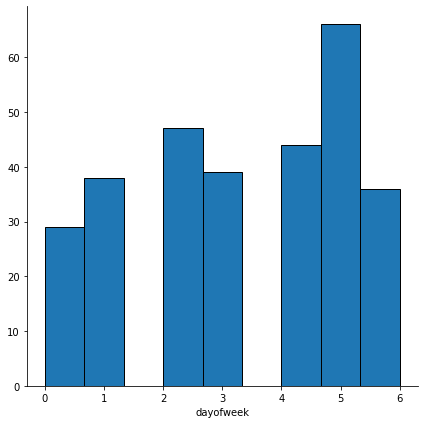

In [311]:
df["dayofweek"] = df["Date"].dt.dayofweek #Get the day of the week the order was from
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10) #Modify the bins to start from the min day, and end at the max day
g = sns.FacetGrid(df, height=6)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k") #maps the dataframe to a histogram
plt.show()#Show the figure

In [312]:
df["dayofweek"].value_counts()

5    66
2    47
4    44
3    39
1    38
6    36
0    29
Name: dayofweek, dtype: int64

According to the above figure, there are more orders on day 5, which is Saturday

In [313]:
df["dayofweek"]

0      2
1      1
2      5
3      3
4      6
      ..
295    4
296    2
297    4
298    6
299    5
Name: dayofweek, Length: 299, dtype: int64

In [314]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0) #Create a new column weekend, Return 1 if the order was on a weekend, return 0 otherwise
df.head()

,Date,Name of Customer,Time of Order,Expected Time out,Expected Time of Delivery,Time Out Update,Why was the Order not Dispatched in 30mins?,Action Taken,New Expected Time Out,New Expected Time of Delivery,...,Hake 1kg,Hake 1kg (Cleaned),Titus 1kg,Titus 1kg (Cleaned),Chicken 1kg,Cow Head & Neck 1kg,Naira Value,Fulfilment Center,dayofweek,weekend
0,2022-07-06,Mr Ojo Olukunle,17:05,17:35,18:35,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,3185.0,Bashorun,2,0
1,2022-07-26,Mrs Adedokun,11:43,12:13,13:13,Gone,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2340.0,Akobo,1,0
2,2022-08-20,Kemi,11:49,12:19,14:19,Gone,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2340.0,Aleshinloye,5,1
3,2022-12-08,Omotayo A.,11:43,12:13,13:13,Gone,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2340.0,Onikolobo,3,0
4,2022-03-06,Osasu,14:37,15:07,17:07,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1430.0,Alakia,6,1


In [315]:
df["weekend"].value_counts()

0    153
1    146
Name: weekend, dtype: int64

In [316]:
weekend = df.groupby("weekend") #Group the orders by weekend

In [317]:
weekend_amount = weekend.get_group(0).sum()["Naira Value"] #Get the sum of money which was on a weekday not weekend
print(f"The total amount made on a weekend is {weekend_amount}")

The total amount made on a weekend is 659425.0


C:\Users\OLUWAF~1\AppData\Local\Temp/ipykernel_24488/9903563.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [318]:
weekday_amount = weekend.get_group(1).sum()["Naira Value"] #Get the sum of money which was on a weekend not weekday
print(f"The total amount made on a weekend is {weekday_amount}")

The total amount made on a weekend is 693485.0


C:\Users\OLUWAF~1\AppData\Local\Temp/ipykernel_24488/337128865.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



More money was made on the weekend - N693,485, compared to the weekdays - N659,425

## Orders at the different Time of day

In [328]:
def f(data):
    """
    This function takes in the dataset
    and returns the hour of the day the
    order was
    """
    hour_of_day = []
    for index,record in data.iterrows():
        x = int(record["Time of Order"].split(":")[0])
        if (x > 4) and (x <= 8):
            hour="Early Morning"
        elif (x > 8) and (x <= 12 ):
            hour='Morning'
        elif (x > 12) and (x <= 16):
            hour='Noon'
        elif (x > 16) and (x <= 20) :
            hour='Eve'
        elif (x > 20) and (x <= 24):
            hour='Night'
        elif (x <= 4):
            hour='Late Night'
        hour_of_day.append(hour)
    return hour_of_day

print(f.__doc__)


    This function takes in the dataset
    and returns the hour of the day the
    order was
    


In [329]:
df["Hour of Day"] = f(df)
df["Hour of Day"].value_counts()

Noon             130
Morning          118
Eve               21
Late Night        21
Early Morning      9
Name: Hour of Day, dtype: int64